## All imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.1f' % x)

## Working with data:

In [2]:
apple_store = pd.read_csv("appstore/AppleStore.csv")
apple_store_desc = pd.read_csv("appstore/appleStore_description.csv")
# importing all data for AppStore 


apple_store = apple_store.drop(['id', 'Unnamed: 0'], axis=1).astype({'size_bytes': 'int64',})

In [3]:
google_play_store = pd.read_csv("googleplay/googleplaystore.csv")
google_play_store_reviews = pd.read_csv("googleplay/googleplaystore_user_reviews.csv")
# importing all data for GooglePlay



for index in google_play_store.index:
    size = google_play_store.loc[index, 'Size']
    installs = google_play_store.loc[index, 'Installs']
    price = google_play_store.loc[index, 'Price']
    if installs.find("+") != -1:
        google_play_store.loc[index, 'Installs'] = installs[:-1].replace(",", "")
    if size.find("M") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 125000 
        # removing "M" changing type from str to float and converting to bytes 
    elif size.find("k") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 1000 
        # removing "k" changing type from str to float and converting to bytes 
    elif size.find('Varies') != -1:
        google_play_store.loc[index, 'Size'] = -1
    if price.find("$") != -1:
        google_play_store.loc[index, 'Price'] = price[1:]
        
        
google_play_store = google_play_store.astype({"Reviews": 'int32', "Rating": float, "Installs": 'int32', "Size": float, 'Price': float})\
.rename({'Size': 'size_bytes', 'Reviews': 'rating_count_total', 'Rating': 'rating', 'App': 'app', 'Current Ver': "ver", 'Price': 'price', 'Installs': 'installs'}, axis=1)


# make apple store genres and google play store categories with equal names
# todo music in google play

google_play_store['Genres'] = google_play_store['Genres'].str.split(';').str[0]

google_play_store['Genres'].replace('Music & Audio', 'Music', inplace = True)
google_play_store['Genres'].replace('Music & Video', 'Music', inplace = True)

#google_play_store['Category'].replace('Music & Video', 'Music', inplace = True)
#google_play_store['Category'].replace(' ', 'Music', inplace = True) #saffssdafsdsfsdfsdfdsfdsfsdfsdfsfsd

google_play_store['Category'].replace('GAME', 'Games', inplace = True)
google_play_store['Category'].replace('PRODUCTIVITY', 'Productivity', inplace = True)
google_play_store['Category'].replace('WEATHER', 'Weather', inplace = True)
google_play_store['Category'].replace('SHOPPING', 'Shopping', inplace = True)
google_play_store['Category'].replace('FINANCE', 'Finance', inplace = True)
google_play_store['Category'].replace('TOOLS', 'Utilities', inplace = True)
google_play_store['Category'].replace('PERSONALIZATION', 'Utilities', inplace = True)
google_play_store['Category'].replace('TRAVEL_AND_LOCAL', 'Travel', inplace = True)
google_play_store['Category'].replace('SOCIAL', 'Social Networking', inplace = True)
google_play_store['Category'].replace('DATING', 'Social Networking', inplace = True)
google_play_store['Category'].replace('COMMUNICATION', 'Social Networking', inplace = True)
google_play_store['Category'].replace('SPORTS', 'Sports', inplace = True)
google_play_store['Category'].replace('BUSINESS', 'Business', inplace = True)
google_play_store['Category'].replace('HEALTH_AND_FITNESS', 'Health & Fitness', inplace = True)
google_play_store['Category'].replace('BEAUTY', 'Health & Fitness', inplace = True)
google_play_store['Category'].replace('ENTERTAINMENT', 'Entertainment', inplace = True)
google_play_store['Category'].replace('COMICS', 'Entertainment', inplace = True)
google_play_store['Category'].replace('VIDEO_PLAYERS', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('PHOTOGRAPHY', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('ART_AND_DESIGN', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('MAPS_AND_NAVIGATION', 'Navigation', inplace = True)
google_play_store['Category'].replace('EDUCATION', 'Education', inplace = True)
google_play_store['Category'].replace('PARENTING', 'Education', inplace = True)
google_play_store['Category'].replace('LIFESTYLE', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('EVENTS', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('HOUSE_AND_HOME', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('AUTO_AND_VEHICLES', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('FAMILY', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('FOOD_AND_DRINK', 'Food & Drink', inplace = True)
google_play_store['Category'].replace('NEWS_AND_MAGAZINES', 'News', inplace = True)
google_play_store['Category'].replace('MEDICAL', 'Medical', inplace = True)
google_play_store['Category'].replace('LIBRARIES_AND_DEMO', 'Catalogs', inplace = True)


apple_store.prime_genre.replace('Book', 'Books & Reference', inplace = True)
apple_store.prime_genre.replace('Reference', 'Books & Reference', inplace = True)
google_play_store['Category'].replace('BOOKS_AND_REFERENCE', 'Books & Reference', inplace = True)


In [4]:
#google_play_store[google_play_store['price'] > 60] # uncomment and run to see all expensive apps

In [5]:
# all apps with price above 110 is just "i am rich" and "most expensive app" so i think we can easily remove them
google_play_store = google_play_store[google_play_store['price'] <= 110]

#### After cells above:
    google_play_store :
        * reviews, installs are now type:int32
        * rating, size, price are now type:float
        * size now is int and it is in bytes
        * rating - plus "+" sign removed
        * junk/scam apps like "i am rich" with price 400 removed
        
    apple_store : (нехватает конечно количества скачиваний но можно написать примерное количество исходя из соотношения кол-ва оценок/кол-во скачиваний в гуглплэй)
        *

#### Cell bellow is for playing with dataframes

<IPython.core.display.Javascript object>


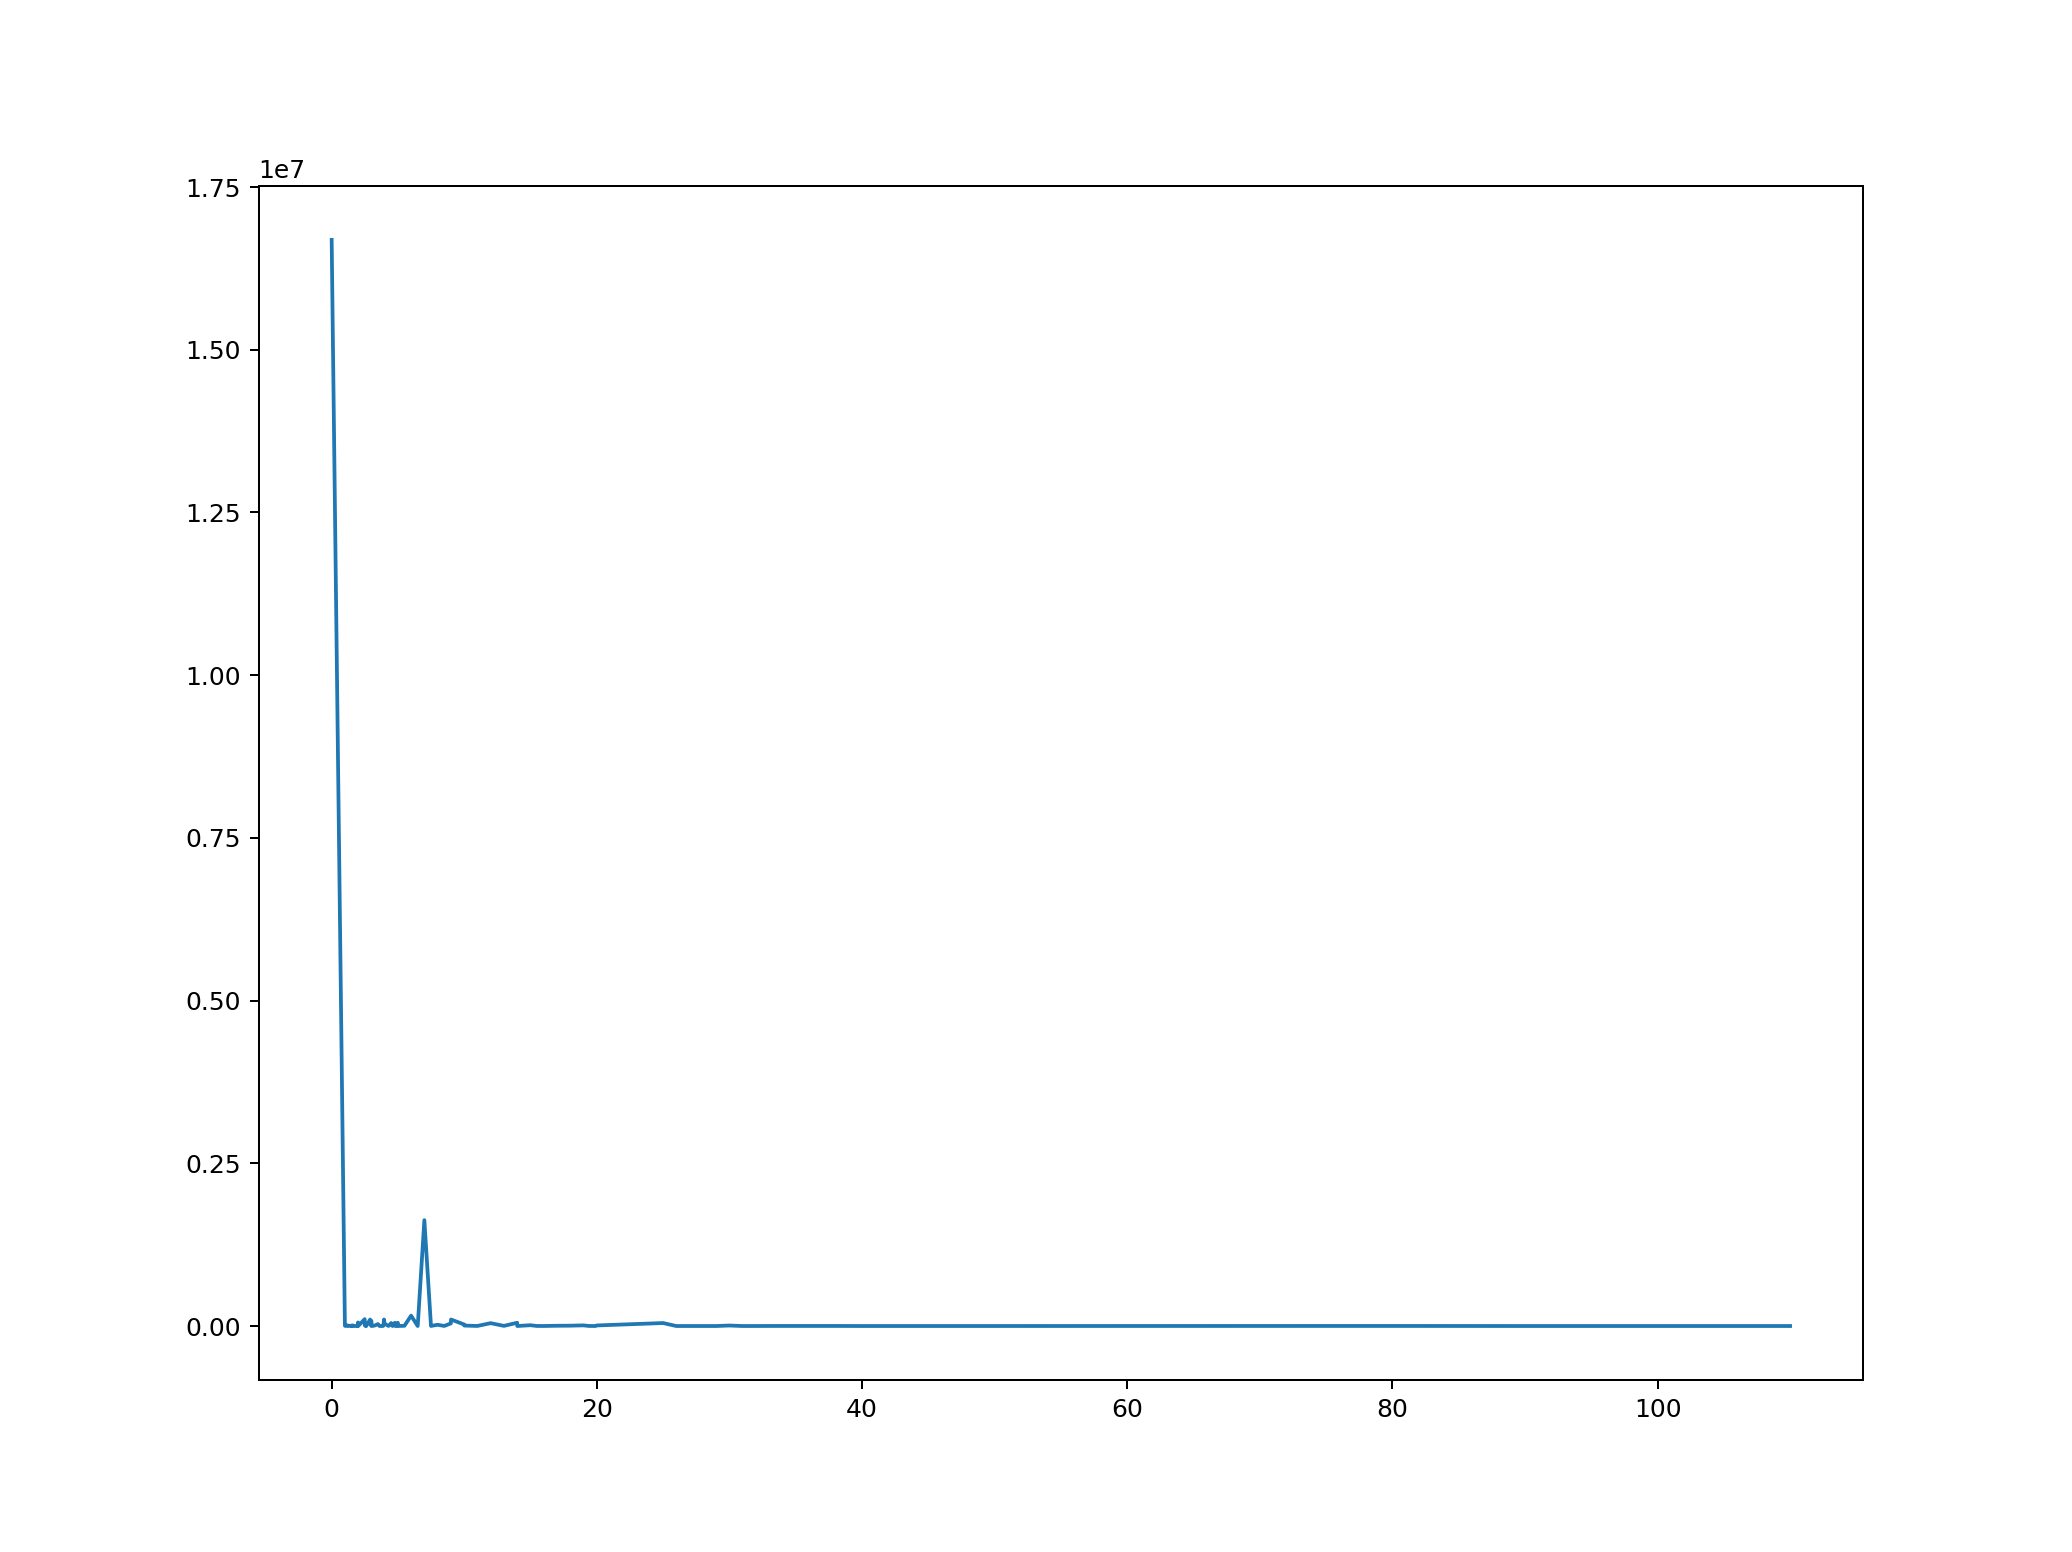

In [6]:
%matplotlib notebook
google_play_store[(google_play_store["rating_count_total"] > 300) & (google_play_store["rating"] >= 4.9)].sort_values(by=["rating_count_total"]) # apps with multiple genres are not in this top


paid_apps = google_play_store[google_play_store['price'] != 0.0]
df1 = paid_apps.groupby("price").mean()
df2 = google_play_store.groupby("price").mean()

plt.plot(df2.index, df2['installs'])

In [7]:
#apple_store.groupby("price").mean()

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
#google_play_store.groupby("price").mean()

In [10]:
#google_play_store.describe()

In [11]:
#apple_store.describe()

In [12]:
#apple_store.isnull().sum()

In [13]:
#google_play_store.isnull().sum()

In [14]:
#google_play_store.hist()

In [15]:
#apple_store.prime_genre.unique()

#apple_store.sort_values(by='prime_genre', ascending=True)

sorted(apple_store.prime_genre.unique())

['Books & Reference',
 'Business',
 'Catalogs',
 'Education',
 'Entertainment',
 'Finance',
 'Food & Drink',
 'Games',
 'Health & Fitness',
 'Lifestyle',
 'Medical',
 'Music',
 'Navigation',
 'News',
 'Photo & Video',
 'Productivity',
 'Shopping',
 'Social Networking',
 'Sports',
 'Travel',
 'Utilities',
 'Weather']

In [16]:
#google_play_store['Category'].unique()

#google_play_store.sort_values(by='Category', ascending=True)

sorted(google_play_store['Category'].unique())

['Books & Reference',
 'Business',
 'Catalogs',
 'Education',
 'Entertainment',
 'Finance',
 'Food & Drink',
 'Games',
 'Health & Fitness',
 'Lifestyle',
 'Medical',
 'Navigation',
 'News',
 'Photo & Video',
 'Productivity',
 'Shopping',
 'Social Networking',
 'Sports',
 'Travel',
 'Utilities',
 'Weather']

In [17]:
#google_play_store['Genres'].unique()